In [64]:
#Graph of percentage of total donation given to each party by year 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
file ='spd.csv'
df = pd.read_csv(file, index_col=0, parse_dates=True)
#df.head()
#df.info()
df

,Team,League,Recipient,Amount,Election Year,Party
Owner,,,,,,
Adam Silver,Commissioner,NBA,WRIGHT 2016,4000.0,2016,Democrat
Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,2800.0,2020,Democrat
Adam Silver,Commissioner,NBA,CORY 2020,2700.0,2020,Democrat
Adam Silver,Commissioner,NBA,Kamala Harris for the People,2700.0,2020,Democrat
Adam Silver,Commissioner,NBA,Win The Era PAC,2700.0,2020,Democrat
...,...,...,...,...,...,...
Zygi Wilf,Minnesota Vikings,NFL,ANGIE CRAIG FOR CONGRESS,2700.0,2018,Democrat
Zygi Wilf,Minnesota Vikings,NFL,DEAN PHILLIPS FOR CONGRESS,2700.0,2018,Democrat
Zygi Wilf,Minnesota Vikings,NFL,MENENDEZ FOR SENATE,2700.0,2018,Democrat


In [67]:
dfgroup = df.groupby(['Election Year', 'Party'], as_index=False)['Amount'].sum()
dfgroup

,Election Year,Party,Amount
0,2016,Bipartisan,578050.0
1,2016,"Bipartisan, but mostly Democratic",2000.0
2,2016,"Bipartisan, but mostly Republican",83638.0
3,2016,Democrat,4065094.0
4,2016,Independent,2700.0
5,2016,Republican,12940514.0
6,2018,Bipartisan,540083.0
7,2018,"Bipartisan, but mostly Democratic",6000.0
8,2018,"Bipartisan, but mostly Republican",99103.0
9,2018,Democrat,4174212.0


In [68]:
df12=dfgroup.loc[dfgroup['Party'] == 'Republican']
df12

,Election Year,Party,Amount
5,2016,Republican,12940514.0
11,2018,Republican,11282570.0
16,2020,Republican,10022932.0


In [69]:
df123=dfgroup.loc[dfgroup['Party'] == 'Democrat']
df123

,Election Year,Party,Amount
3,2016,Democrat,4065094.0
9,2018,Democrat,4174212.0
15,2020,Democrat,1874333.0


In [70]:
#Total Sum of all 3 years 
df_sum = dfgroup["Amount"].sum()
df_sum

46129747.0

In [71]:
#Calculations for Percentage of Donations By Party For a Specific Year
#Republicans2016
dfx = dfgroup.loc[(dfgroup["Election Year"]) == 2016] 
dfy = dfx["Amount"].sum() #Total Amount Donated in only 2016
dfz = dfx.loc[(dfx["Party"]) == "Republican"] ["Amount"].sum()
dfz #dfz.info()#dfz["Amount"]
r2016 = dfz/dfy*100 #Percent=TotalPartyAmount/TotalAmt2020
r2016


73.22610303895497

In [72]:
#Democrat-2016
dfg = dfgroup.loc[(dfgroup["Election Year"]) == 2016] 
dfh = dfg["Amount"].sum()
dfi = dfg.loc[(dfg["Party"]) == "Democrat"] ["Amount"].sum()
dfi 
d2016 = dfi/dfh * 100
d2016

23.003026935949965

In [73]:
#Republicans-2018
dfa = dfgroup.loc[(dfgroup["Election Year"]) == 2018] 
dfb = dfa["Amount"].sum()
dfc = dfa.loc[(dfa["Party"]) == "Republican"] ["Amount"].sum()
dfc 
r2018 = dfc/dfb * 100
r2018

70.02254361261826

In [74]:
#Democrat-2018
dfj = dfgroup.loc[(dfgroup["Election Year"]) == 2018] 
dfk = dfj["Amount"].sum()
dfl = dfj.loc[(dfj["Party"]) == "Democrat"] ["Amount"].sum()
dfl 
d2018 = dfl/dfk * 100
d2018

25.906237835733748

In [75]:
#Republicans-2020
dfd = dfgroup.loc[(dfgroup["Election Year"]) == 2020] 
dfe = dfd["Amount"].sum()
dff = dfd.loc[(dfd["Party"]) == "Republican"] ["Amount"].sum()
dff 
r2020 = dff/dfe*100
r2020 

81.19032646703523

In [76]:
#Democrat-2020
dfm = dfgroup.loc[(dfgroup["Election Year"]) == 2020] 
dfn = dfm["Amount"].sum()
dfo = dfm.loc[(dfm["Party"]) == "Democrat"] ["Amount"].sum()
dfo 
d2020 = dfo/dfn * 100
d2020

15.182953269356467

## Political Donations by Sports Owners

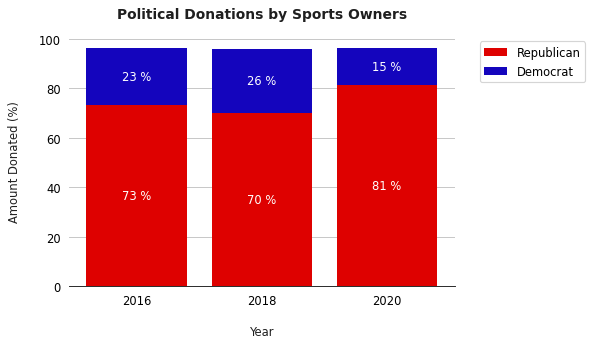

In [101]:
#Main Stacked bargraph
#DataFrame for Republican
data = { 'year': ['2016','2018','2020'], 'values' :[r2016,r2018,r2020]}
info = pd.DataFrame(data)
info
#DataFrame for Democrat
data0 = { 'year': ['2016','2018','2020'], 'values' :[d2016,d2018,d2020]}
info0 = pd.DataFrame(data0)
info0

labels =['2016','2018','2020']
width = 0.80
fig, ax = plt.subplots()
ax.bar(data ['year'], data ['values'],width, label = 'Republican',color = '#DE0100')
ax.bar(data0 ['year'], data0 ['values'],width, label = 'Democrat',color = '#1405BD', bottom = data['values'])

#label percentages on bars
for p in ax.patches:
        width, height = p.get_width(), p.get_height() 
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',
                color = '#FFFFFF')
#Remove Figure borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#1f1f1f')
ax.tick_params(bottom=False, left=False)


# grid lines
ax.set_axisbelow(True)
#ax.yaxis.grid(color='black', linestyle='dashed', alpha=0.2)
ax.yaxis.grid(True, color='#c4c4c4')
ax.xaxis.grid(False)
        
#labels
#plt.xticks(rotation=30, horizontalalignment="center")
ax.set_xlabel('Year', labelpad=15, color='#212121')
ax.set_ylabel('Amount Donated (%)', labelpad=15, color='#212121')
ax.set_title('Political Donations by Sports Owners', pad=15, color='#1f1f1f',  weight='bold')
             #size = 15, )
ax.legend(bbox_to_anchor = (1.05,1.0),loc = 'upper left')
fig.set_dpi(83)
plt.show()

#subplots with different leagues
#How much donations go into each league from each party

In [78]:
dfgroup2 = df.groupby(['League', 'Party'], as_index=False)['Amount'].sum()
#dfgroup2

In [79]:
#MLB-Democrat
MLB= dfgroup2.loc[(dfgroup2["League"]) == 'MLB'] 
MLB2 = MLB["Amount"].sum()
MLB3 = MLB.loc[(MLB["Party"]) == "Democrat"] ["Amount"].sum()
MLB3
New_MLB = MLB3/MLB2 * 100
New_MLB

22.939567289448394

In [80]:
#NBA-Democrat
NBA= dfgroup2.loc[(dfgroup2["League"]) == 'NBA'] 
NBA2 = NBA["Amount"].sum()
NBA3 = NBA.loc[(NBA["Party"]) == "Democrat"] ["Amount"].sum()
NBA3
New_NBA = NBA3/NBA2 * 100
New_NBA

17.750203444318853

In [81]:
#NFL-Democrat
NFL= dfgroup2.loc[(dfgroup2["League"]) == 'NFL'] 
NFL2 = NFL["Amount"].sum()
NFL3 = NFL.loc[(NFL["Party"]) == "Democrat"] ["Amount"].sum()
NFL3
New_NFL = NFL3/NFL2 * 100
New_NFL

10.283028770133507

In [82]:
#NHL-Democrat
NHL = dfgroup2.loc[(dfgroup2["League"]) == 'NHL'] 
NHL2 = NHL["Amount"].sum()
NHL3 = NHL.loc[(NHL["Party"]) == "Democrat"] ["Amount"].sum()
NHL3
New_NHL = NHL3/NHL2 * 100
New_NHL

18.512229899640214

In [83]:
#NASCAR-Democrat
NASCAR = dfgroup2.loc[(dfgroup2["League"]) == 'NASCAR'] 
NASCAR2 = NASCAR["Amount"].sum()
NASCAR3 = NASCAR.loc[(NASCAR["Party"]) == "Democrat"] ["Amount"].sum()
NASCAR3
New_NASCAR = NASCAR3/NASCAR2 * 100
New_NASCAR

12.90278736890662

In [84]:
#WNBA-Democrat
WNBA = dfgroup2.loc[(dfgroup2["League"]) == 'WNBA'] 
WNBA2 = WNBA["Amount"].sum()
WNBA3 = WNBA.loc[(WNBA["Party"]) == "Democrat"] ["Amount"].sum()
WNBA3
New_WNBA = WNBA3/WNBA2 * 100
New_WNBA

43.77204818407361

In [85]:
#MLB-Republican
RMLB= dfgroup2.loc[(dfgroup2["League"]) == 'MLB'] 
RMLB2 = RMLB["Amount"].sum()
RMLB3 = RMLB.loc[(RMLB["Party"]) == "Republican"] ["Amount"].sum()
RMLB3
New_RMLB = RMLB3/RMLB2 * 100
New_RMLB

74.89147724626115

In [86]:
#NBA-Republican
RNBA = dfgroup2.loc[(dfgroup2["League"]) == 'NBA'] 
RNBA2 = RNBA["Amount"].sum()
RNBA3 = RNBA.loc[(RNBA["Party"]) == "Republican"] ["Amount"].sum()
RNBA3
New_RNBA = RNBA3/RNBA2 * 100
New_RNBA

80.36415879407774

In [87]:
#NFL-Republican
RNFL= dfgroup2.loc[(dfgroup2["League"]) == 'NFL'] 
RNFL2 = RNFL["Amount"].sum()
RNFL3 = RNFL.loc[(RNFL["Party"]) == "Republican"] ["Amount"].sum()
RNFL3
New_RNFL = RNFL3/RNFL2 * 100
New_RNFL

78.23617445596784

In [88]:
#NHL-Republican
RNHL = dfgroup2.loc[(dfgroup2["League"]) == 'NHL'] 
RNHL2 = RNHL["Amount"].sum()
RNHL3 = RNHL.loc[(RNHL["Party"]) == "Republican"] ["Amount"].sum()
RNHL3
New_RNHL = RNHL3/RNHL2 * 100
New_RNHL

77.97105337778551

In [89]:
#NASCAR-Republican
RNASCAR = dfgroup2.loc[(dfgroup2["League"]) == 'NASCAR'] 
RNASCAR2 = RNASCAR["Amount"].sum()
RNASCAR3 = RNASCAR.loc[(RNASCAR["Party"]) == "Republican"] ["Amount"].sum()
RNASCAR3
New_RNASCAR = RNASCAR3/RNASCAR2 * 100
New_RNASCAR

78.72261265553074

In [90]:
#WNBA-Republican
RWNBA = dfgroup2.loc[(dfgroup2["League"]) == 'WNBA'] 
RWNBA2 = RWNBA["Amount"].sum()
RWNBA3 = RWNBA.loc[(RWNBA["Party"]) == "Republican"] ["Amount"].sum()
RWNBA3
New_RWNBA = RWNBA3/RWNBA2 * 100
New_RWNBA

51.67138903426963

### Leagues are mostly supported by which political party- R/D ?

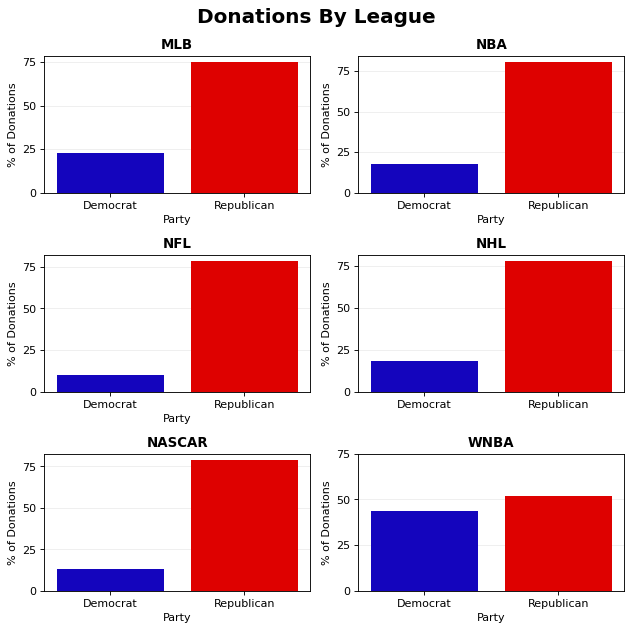

In [91]:
#DataFrame for  League-MLB
data1 = {'party':['Democrat','Republican', ], 'values': [New_MLB, New_RMLB]}
info1 = pd.DataFrame(data1)
info1
data2 = {'party':['Democrat','Republican', ], 'values': [New_NBA, New_RNBA]}
info2 = pd.DataFrame(data2)
info2
data3 = {'party':['Democrat','Republican', ], 'values': [New_NFL, New_RNFL]}
info3 = pd.DataFrame(data3)
info3
data4 = {'party':['Democrat','Republican', ], 'values': [New_NHL, New_RNHL]}
info4 = pd.DataFrame(data4)
info4
data5 = {'party':['Democrat','Republican', ], 'values': [New_NASCAR, New_RNASCAR]}
info5 = pd.DataFrame(data5)
info5
data6 = {'party':['Democrat','Republican', ], 'values': [New_WNBA, New_RWNBA]}
info6 = pd.DataFrame(data6)
info6

fig, ax = plt.subplots(3,2,figsize=(8,8),tight_layout=True)
                       #facecolor='#DCDCDC', edgecolor='k'
ax[0,0].bar(info1 ['party'], info1 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])
ax[0,1].bar(info2 ['party'], info2 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])
ax[1,0].bar(info3 ['party'], info3 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])
ax[1,1].bar(info4 ['party'], info4 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])
ax[2,0].bar(info5 ['party'], info5 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])
ax[2,1].bar(info6 ['party'], info6 ['values'], label = ['Democrat','Republican'],color = ['#1405BD', '#DE0100'])

fig.suptitle('Donations By League', size = 18,  fontweight="bold")
#ax[0, 0].title.set_text('MLB')
ax[0, 0].set_title('MLB', fontweight="bold")
ax[0, 1].set_title('NBA', fontweight="bold")
ax[1, 0].set_title('NFL', fontweight="bold")
ax[1, 1].set_title('NHL', fontweight="bold")
ax[2, 0].set_title('NASCAR', fontweight="bold")
ax[2, 1].set_title('WNBA', fontweight="bold")

ax[0, 0].set_yticks([0,25,50,75])
ax[0, 1].set_yticks([0,25,50,75])
ax[1, 0].set_yticks([0,25,50,75])
ax[1, 1].set_yticks([0,25,50,75])
ax[2, 0].set_yticks([0,25,50,75])
ax[2, 1].set_yticks([0,25,50,75])
#ax[2, 1].set_yticklabels(['0%','25%','50%','75%'])

ax[0, 0].set_xlabel('Party')
ax[0, 1].set_xlabel('Party')
ax[1, 0].set_xlabel('Party')
ax[1, 0].set_xlabel('Party')
ax[0, 1].set_xlabel('Party')
ax[2, 0].set_xlabel('Party')
ax[2, 1].set_xlabel('Party')

ax[0, 0].set_ylabel('% of Donations')
ax[0, 1].set_ylabel('% of Donations')
ax[1, 0].set_ylabel('% of Donations')
ax[1, 1].set_ylabel('% of Donations')
ax[2, 0].set_ylabel('% of Donations')
ax[2, 1].set_ylabel('% of Donations')
#ax[2, 1].set_ylabel('Percentage of Donations')

ax[0, 0].set_axisbelow(True)
ax[0, 0].yaxis.grid(True, color='#EEEEEE')
ax[0, 0].xaxis.grid(False)

ax[0, 1].set_axisbelow(True)
ax[0, 1].yaxis.grid(True, color='#EEEEEE')
ax[0, 1].xaxis.grid(False)

ax[1, 0].set_axisbelow(True)
ax[1, 0].yaxis.grid(True, color='#EEEEEE')
ax[1, 0].xaxis.grid(False)

ax[1, 1].set_axisbelow(True)
ax[1, 1].yaxis.grid(True, color='#EEEEEE')
ax[1, 1].xaxis.grid(False)

ax[2, 0].set_axisbelow(True)
ax[2, 0].yaxis.grid(True, color='#EEEEEE')
ax[2, 0].xaxis.grid(False)

ax[2, 1].set_axisbelow(True)
ax[2, 1].yaxis.grid(True, color='#EEEEEE')
ax[2, 1].xaxis.grid(False)

fig.set_dpi(80)
plt.show()